In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import odeint 
from matplotlib import cm

In [3]:
E_kev = 9 # energy [kev]
E_j = E_kev * 1E3 * 1.6E-19 # energy [J]
m = 1.6E-27 # mass of proton [kg]
vel = np.sqrt((2 * E_j) / m) # velocity [m/s]

p = 1E-2 # pressure currently constant [mbar]
# p_pa = p * 100 # pressure [Pa]
p_pa = 10 # [Pa]
r = 8.314 # universal gas constant for He [J/mol*K]
temp = 400 # temp [K]
Na = 6.023E23 # [mol-1]

Ne = 1E6 # atom number density 
N0_0x = 0.0*Ne # H initial population
N1_0x = 1.0*Ne # H+ initial population
Nneg_0 = 0.0*Ne # H- initial population 
N_arr = np.array([N0_0x, N1_0x, Nneg_0])


In [4]:
# density calc
# p_pa = np.array([x for x in range(1,11)])
# for i in p_pa:
rho = (p_pa / (r * temp)) * Na # [1/m^3]

In [5]:
# Cross sections for H+ --> He [1E-17 cm^2/n(He)] at 9 keV
if E_kev == 9: 
    An0 = 51
    An1 = 4.5
    A0n = 0.32
    A01x = 15
    A1n = 0.13
    A10x = 8

In [6]:
if E_kev == 11: 
    An0 = 50.5
    An1 = 4.4
    A0n = 0.56
    A01x = 15
    A1n = 0.13
    A10x = 10.5

In [7]:
if E_kev == 13: 
    An0 = 49.5
    An1 = 4.3
    A0n = 0.6
    A01x = 15
    A1n = 0.14
    A10x = 14

In [8]:
# Cross sections for H+ --> He [1E-17 cm^2/n(He)] at 15 keV
if E_kev == 15:
    An0 = 48.5
    An1 = 4.2
    A0n = 0.62
    A01x = 14
    A1n = 0.14
    A10x = 17.5

In [9]:
if E_kev == 20: 
    An0 = 44.5
    An1 = 3.5
    A0n = 0.68
    A01x = 13.5
    A1n = 0.12
    A10x = 19.2

In [10]:
if E_kev == 25: 
    An0 = 41
    An1 = 3.2
    A0n = 0.67
    A01x = 13
    A1n = 0.12
    A10x = 19.5

In [11]:
# Cross section array 
A_arr_cm = np.array([An0,An1,A0n,A01x,A1n,A10x]) * np.array(1E-17) # cross section * 10E-17 cm^2
A_arr_m = A_arr_cm * np.array(1E-4) # cross section in m^2 


In [12]:
# alpha calc [1/t]
# alpha = velocity [m/s] * rho [1/m^3] * cross section [m^2] 
alpha = vel * rho * An0 * 1E-21 
time = 1/alpha # [nsec]

In [13]:
# Distance for x-axis [m]
x_steps = 100
x_max = 0.1
x_min = 0 
x_vals = np.linspace(x_min,x_max,x_steps)

In [14]:
# has constant density, therefore differentials are one value each
def rate_eqs(N, x, A, rho):
    dN0dx = rho * ((N[2] * A[0]) - (N[0] * (A[2] + A[3])) + (N[1] * A[5])) # H population change over x
    dN1dx = rho * ((N[2] * A[1]) - (N[1] * (A[4] + A[5])) + (N[0] * A[3])) # H+ evolution over length of chamber, x
    dNnegdx = rho * ((N[0] * A[2]) - (N[2] * (A[0] + A[1])) + (N[1] * A[4])) # H- population change
    return np.array([dN0dx, dN1dx, dNnegdx]) 

In [15]:
# integrate with odeint()
# for i in rho:
Nx = odeint(rate_eqs, [N0_0x, N1_0x, Nneg_0], x_vals, args=(A_arr_m, rho))
    
    # print(i, Nx)

[[0.00000000e+00 1.00000000e+06 0.00000000e+00]
 [1.43363589e+04 9.85435095e+05 2.28545751e+02]
 [2.80908822e+04 9.71469501e+05 4.39616449e+02]
 [4.12865832e+04 9.58078702e+05 6.34714622e+02]
 [5.39456244e+04 9.45239171e+05 8.15204870e+02]
 [6.60893431e+04 9.32928330e+05 9.82326936e+02]
 [7.77382762e+04 9.21124516e+05 1.13720752e+03]
 [8.89121856e+04 9.09806943e+05 1.28087096e+03]
 [9.96300834e+04 8.98955668e+05 1.41424887e+03]
 [1.09910256e+05 8.88551555e+05 1.53818890e+03]
 [1.19770288e+05 8.78576250e+05 1.65346258e+03]
 [1.29227086e+05 8.69012141e+05 1.76077250e+03]
 [1.38296904e+05 8.59842337e+05 1.86075874e+03]
 [1.46995362e+05 8.51050633e+05 1.95400470e+03]
 [1.55337472e+05 8.42621486e+05 2.04104240e+03]
 [1.63337657e+05 8.34539986e+05 2.12235722e+03]
 [1.71009775e+05 8.26791833e+05 2.19839228e+03]
 [1.78367135e+05 8.19363312e+05 2.26955229e+03]
 [1.85422524e+05 8.12241269e+05 2.33620710e+03]
 [1.92188219e+05 8.05413086e+05 2.39869493e+03]
 [1.98676010e+05 7.98866665e+05 2.457325

In [16]:
# Charge state populations 
# data_dict = {}

# for i, array_list in enumerate(Nx, start=1):
#     values_list = []
#     for array in array_list:
#          N0x = Nx[:,0] # H
#          N1x = Nx[:,1] # H+
#          Nneg = Nx[:,2] # H-
#          values_list.append((N0x, N1x, Nneg))
  
#     data_dict[i] = values_list

# for i, values_list in data_dict.items():
#     print(f"i = {i}")
#     for x, y, z in values_list:
#         print(f"Nneg:{z}")

N0x = Nx[:,0] # H
N1x = Nx[:,1] # H+
Nneg = Nx[:,2] # H-
    # print(Nx,'\n ---------')


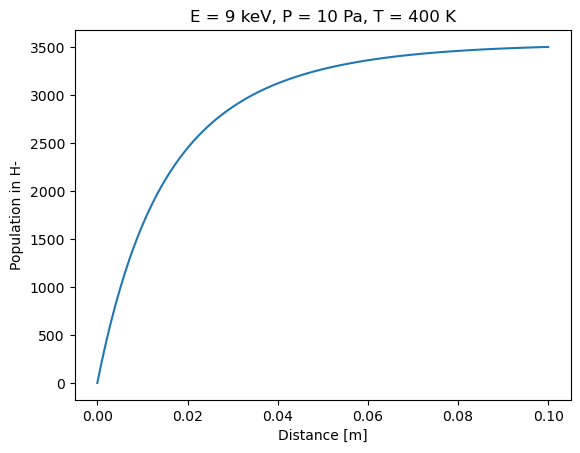

In [17]:
# Plotting 
# plt.plot(x, N1x, label='H+')
# plt.plot(x, N0x, label='H')
# for i in p_pa: 
plt.plot(x_vals, Nneg, label='H-')
# plt.legend()
plt.xlabel('Distance [m]')
# plt.ylabel('Population in H+, H, H-')
plt.ylabel('Population in H-')
plt.title(f'E = 9 keV, P = 10 Pa, T = 400 K')
plt.show()


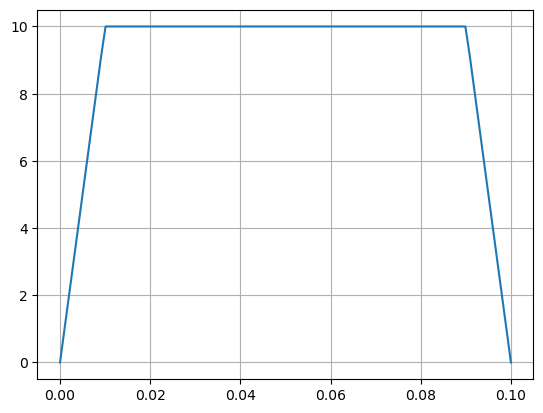

In [18]:
# Pressure gradient- new script??
pressure_list = []
constant_start = int(x_steps * 0.1)
constant_end = int(x_steps * 0.9)
slope = p_pa / (0.1 * x_max)

for i, x in enumerate(x_vals):
    if i < constant_start: 
        pressure = slope * x
    elif i >= constant_start and i < constant_end:
        pressure = p_pa
    else:
        pressure = -slope * (x - x_max * 0.9) + p_pa
    pressure_list.append(pressure)
     
plt.plot(x_vals,pressure_list)
plt.grid(True)



In [19]:
def density_calc(pressure):
    new_rho = (pressure / np.array((r * temp)) * Na)
    return new_rho

In [20]:
# calc differentials for rate/transport equations
def rate_eqs(N, x, A, pressure):
    # dN0dx_list = []
    # dN1dx_list = []
    # dNnegdx_list = []

    # for i in pressure:
    dN0dx = density_calc(pressure) * ((N[2] * A[0]) - (N[0] * (A[2] + A[3])) + (N[1] * A[5])) # H population change over x
    # dN0dx_list.append(dN0dx)
    dN1dx = density_calc(pressure) * ((N[2] * A[1]) - (N[1] * (A[4] + A[5])) + (N[0] * A[3])) # H+ evolution over length of chamber, x
    # dN1dx_list.append(dN1dx)
    dNnegdx = density_calc(pressure) * ((N[0] * A[2]) - (N[2] * (A[0] + A[1])) + (N[1] * A[4])) # H- population change
    # dNnegdx_list.append(dNnegdx)   
  
    return [dN0dx, dN1dx, dNnegdx] #return [dN0dx_list, dN1dx_list, dNnegdx_list]
# rate_eqs([N0_0x, N1_0x, Nneg_0], x_vals, A_arr_m, pressure_list)





In [21]:
# integrate differentials
N0x_list = []
N1x_list = []
Nnegx_list = []
pos_list = []

# dN0dx_list, dN1dx_list, dNnegdx_list = rate_eqs([N0_0x, N1_0x, Nneg_0], x_vals, A_arr_m, pressure_list)

for pressure in pressure_list:
    Nx = odeint(rate_eqs, [N0_0x, N1_0x, Nneg_0], x_vals, args=(A_arr_m, pressure)) # integrates differentials with respect to x given initial conditions, because the function is being called, extra args also must be added 
    N0x = Nx[:,0] # H
    N0x_list.append(N0x)
    N1x = Nx[:,1] # H+
    N1x_list.append(N1x)
    Nnegx = Nx[:,2] # H-
    Nnegx_list.append(Nnegx)
    pos_list.append(x_vals)

# N0x = Nx[:,0] # H
# N1x = Nx[:,1] # H+
# Nneg = Nx[:,2] # H
# print(Nnegx_list)
# inner_Nnegx_list = []
Nnegx_vals = []

for i in range(len(Nnegx_list)):
    inner_Nnegx_list = Nnegx_list[i]
    Nnegx_val = inner_Nnegx_list[i]
    Nnegx_vals.append(Nnegx_val)


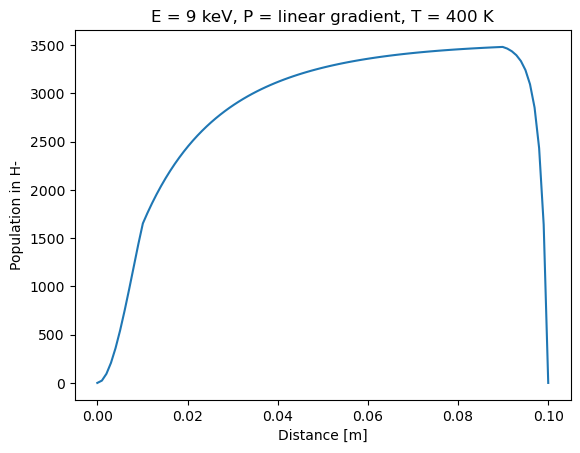

In [22]:
# plt.plot(x, N1x, label='H+')
# plt.plot(x, N0x, label='H')
plt.plot(x_vals, Nnegx_vals)
# plt.legend()
plt.xlabel('Distance [m]')
# plt.ylabel('Population in H+, H, H-')
plt.ylabel('Population in H-')
plt.title(f'E = 9 keV, P = linear gradient, T = 400 K')
plt.show()
# plt.plot(x, pressure)

In [23]:
np.interp(0.5,x_vals,Nneg)

3499.2753719938037

In [24]:
energy_9kev = np.full((1,10), 9)
negion_9kev = np.array([3267.4375634327707, 3499.275372002196, 3526.8832309660743, 3530.294361192614, 3530.716635640064, 3530.7689182547447, 
               3530.7754240542563, 3530.77620192743, 3530.7762830555935, 3530.77630383468])

energy_11kev = np.full((1,10), 11)
negion_11kev = np.array([4985.007087151802, 5518.368288706308, 5571.702332823366, 5577.012947825899, 5577.541607739151, 5577.594238731643,
                 5577.599468915899, 5577.6, 5577.6, 5577.6])

energy_13kev = np.full((1,10), 13)
negion_13kev = np.array([6072.754498822196, 6651.081060416886, 6694.106639455999, 6697.242020166319, 6697.470055598773, 6697.486631085464,
                6697.487838782522, 6697.487, 6697.487, 6697.487])

energy_15kev = np.full((1,10), 15)
negion_15kev = np.array([6991.321388618618, 7624.9930033839555, 7663.589916744218, 7665.846119641021, 7665.977302165565, 7665.984920895262, 
                7665.985, 7665.985, 7665.985, 7665.985])

energy_20kev = np.full((1,10), 20)
negion_20kev = np.array([8331.024155229587, 9214.53032810142, 9266.436461910991, 9269.240258966764, 9269.389105473503, 9269.396986589089, 
                9269.397396793756, 9269.397, 9269.397, 9269.397])

energy_25kev = np.full((1,10), 25)
negion_25kev = np.array([8949.776809693616, 10012.95442210075, 10080.126759870422, 10083.924561649013, 10084.132964681303, 10084.144291293187,
                10084.14491000588, 10084.144, 10084.144, 10084.144])


In [25]:
#Energy 
row_arrays = [energy_9kev, energy_11kev, energy_13kev, energy_15kev, energy_20kev, energy_25kev]
    
# Initialize an empty list to hold the rows of the matrix
matrix_rows = []

# Loop through each row array and stack them to form the matrix
for row_array in row_arrays:
    matrix_rows.append(row_array)

# Create the final matrix by vertically stacking the rows
matrix = np.vstack(matrix_rows)

#Population
row_arrays_n = [negion_9kev, negion_11kev, negion_13kev, negion_15kev, negion_20kev, negion_25kev]
    
# Initialize an empty list to hold the rows of the matrix
matrix_rows_n = []

# Loop through each row array and stack them to form the matrix
for row_array_n in row_arrays_n:
    matrix_rows_n.append(row_array_n)

# Create the final matrix by vertically stacking the rows
matrix_n = np.vstack(matrix_rows_n)

#to plot 
pressure = np.tile(np.arange(1, 11), (6, 1))
energy = matrix 
population = matrix_n


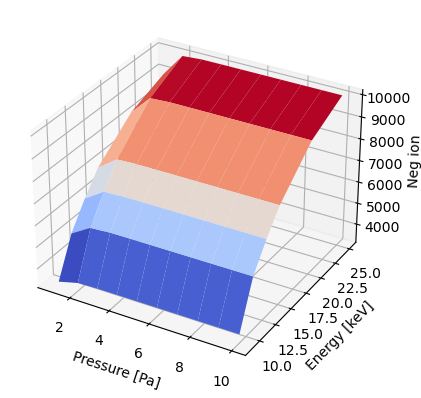

In [26]:


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(pressure, energy, population, cmap=cm.coolwarm)

ax.set_xlabel('Pressure [Pa]')
ax.set_ylabel('Energy [keV]')
ax.set_zlabel('Neg ion')

plt.show()

In [27]:
# E = 9kev 
# negion_9kev = []
# for i in p_pa:
#     negion_9kev.append(np.interp(0.5, x, Nneg))
#     print(i)

    
# negion_9kev 